In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10) # set default size of plots

## Загрузим изображение

In [6]:
image = plt.imread("samoed.png")

(647, 900, 4)


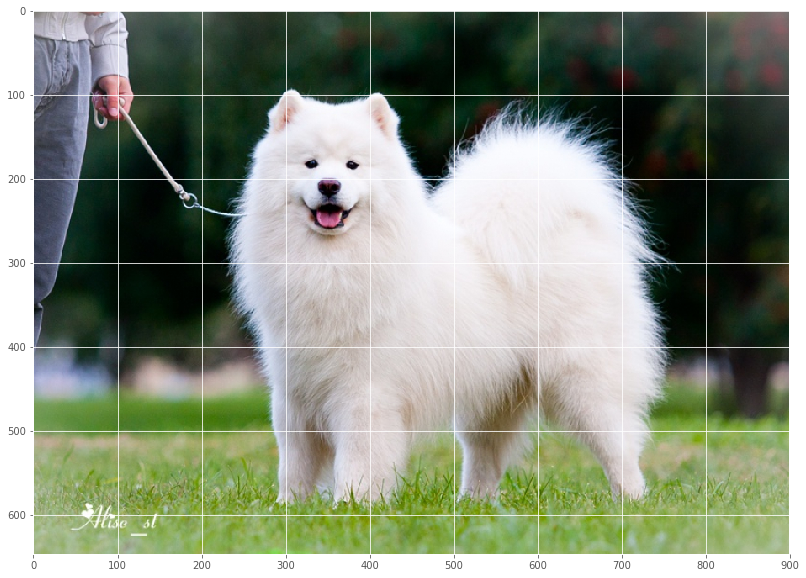

In [64]:
print (image.shape)
plt.imshow(image)

## Свёртки

Реализуйте функцию применяющую ядро kernel к изображению input_image. Для простоты, не будем делать padding, зафиксируем stride равным единице, а ядро свёртки будем считать квадратной матрицей (не трёхмерным тензором!) и приминять к каждому каналу независимо.

AttributeError: 'numpy.ndarray' object has no attribute 'loc'

In [67]:
def conv2d(input_image, kernel):
    h, w, d = input_image.shape
    k_h, k_w = kernel.shape
   
    # Впишите свой код на месте заглушки
    result = np.zeros([h-k_h+1,w-k_w+1,d])
    
    h_center = int(k_h/2)
    w_center = int(k_w/2)

    for i_d in range(d):
        for i_h in range(0,h-k_h+1):
            for i_w in range(0,w-k_w+1):
                result[i_h,i_w,i_d] = np.sum(np.multiply(kernel, input_image[i_h:i_h+k_h,i_w:i_w+k_w,i_d]))
            
    return result      

Опишите ядро свёртки, выполняющее тождественное преобразование

In [90]:
identity_kernel = np.zeros((21,21))
identity_kernel[10,10] = 1

In [91]:
same_image = conv2d(image, identity_kernel)

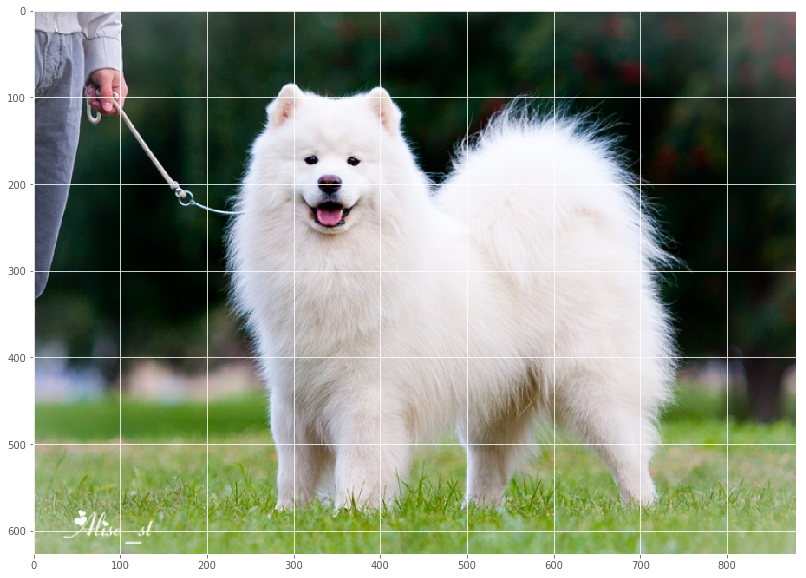

In [92]:
plt.imshow(same_image)

Опишите ядро свёртки, выполняющее размытие

In [93]:
blur_kernel =  np.ones((20,20))/(20**2)

In [94]:
blurry_image =  conv2d(image, blur_kernel)

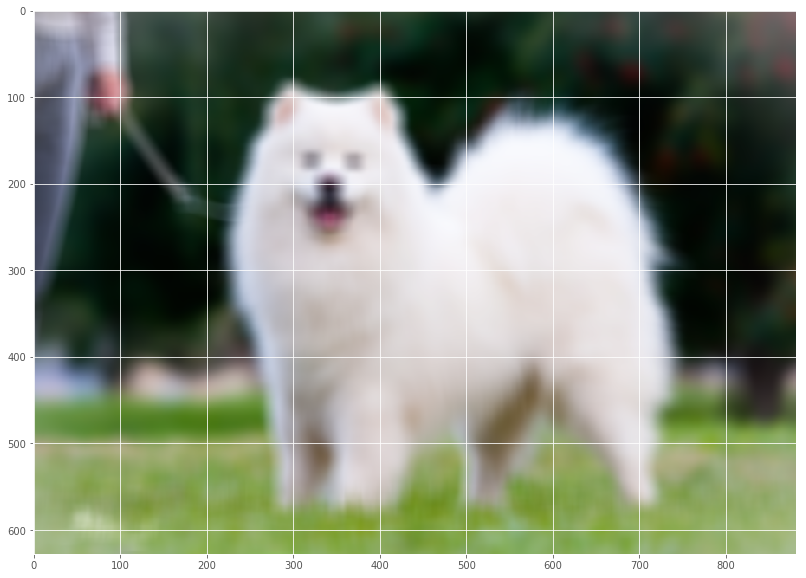

In [95]:
plt.imshow(blurry_image)

А теперь подсветите границы объектов на изображении

In [205]:
edge_kernel = np.ones([21,21]) * -1
edge_kernel[10,10] = (21*21)-1
#edge_kernel = np.array([0.5,-0.5])

In [206]:
edge_image =  conv2d(image, edge_kernel)

In [209]:
for i_d in range(4):
    edge_image[:,:,i_d] = np.abs(edge_image[:,:,i_d])/np.max(edge_image[:,:,i_d])
edge_image[:,:,3] = 1

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


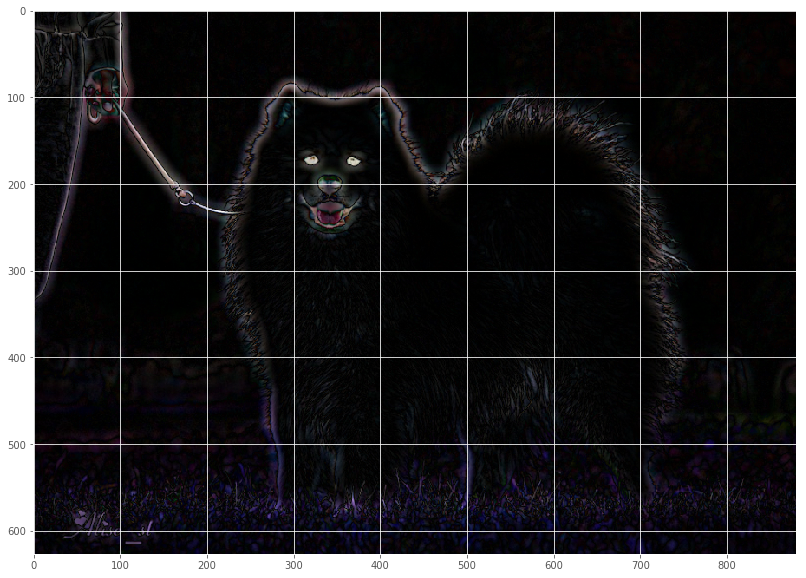

In [210]:
plt.imshow(edge_image)

Кажется, что-то пошло не так... Возможно, необходимо сделать что-то ещё?

C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


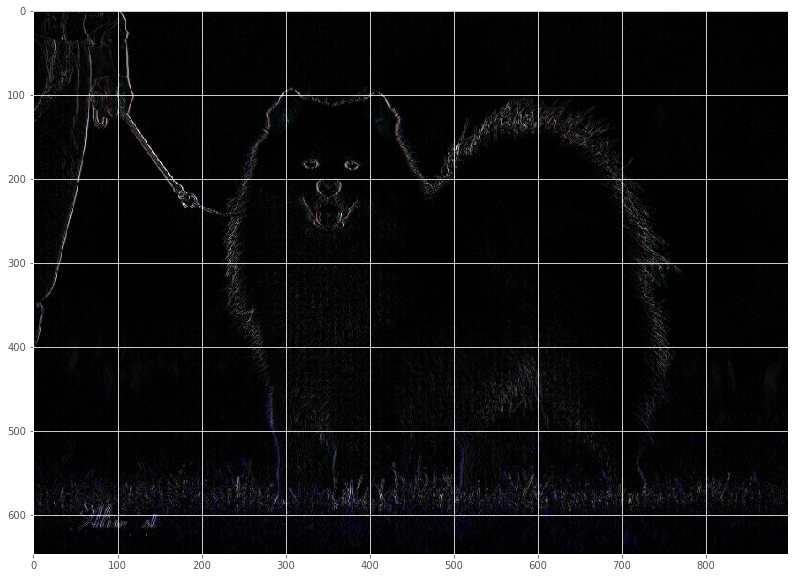

In [214]:
edge_kernel = np.ones([1,2])
edge_kernel[0,1] = -1
edge_image =  conv2d(image, edge_kernel)

for i_d in range(4):
    edge_image[:,:,i_d] = np.abs(edge_image[:,:,i_d])/np.max(edge_image[:,:,i_d])
edge_image[:,:,3] = 1

plt.imshow(edge_image)